In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

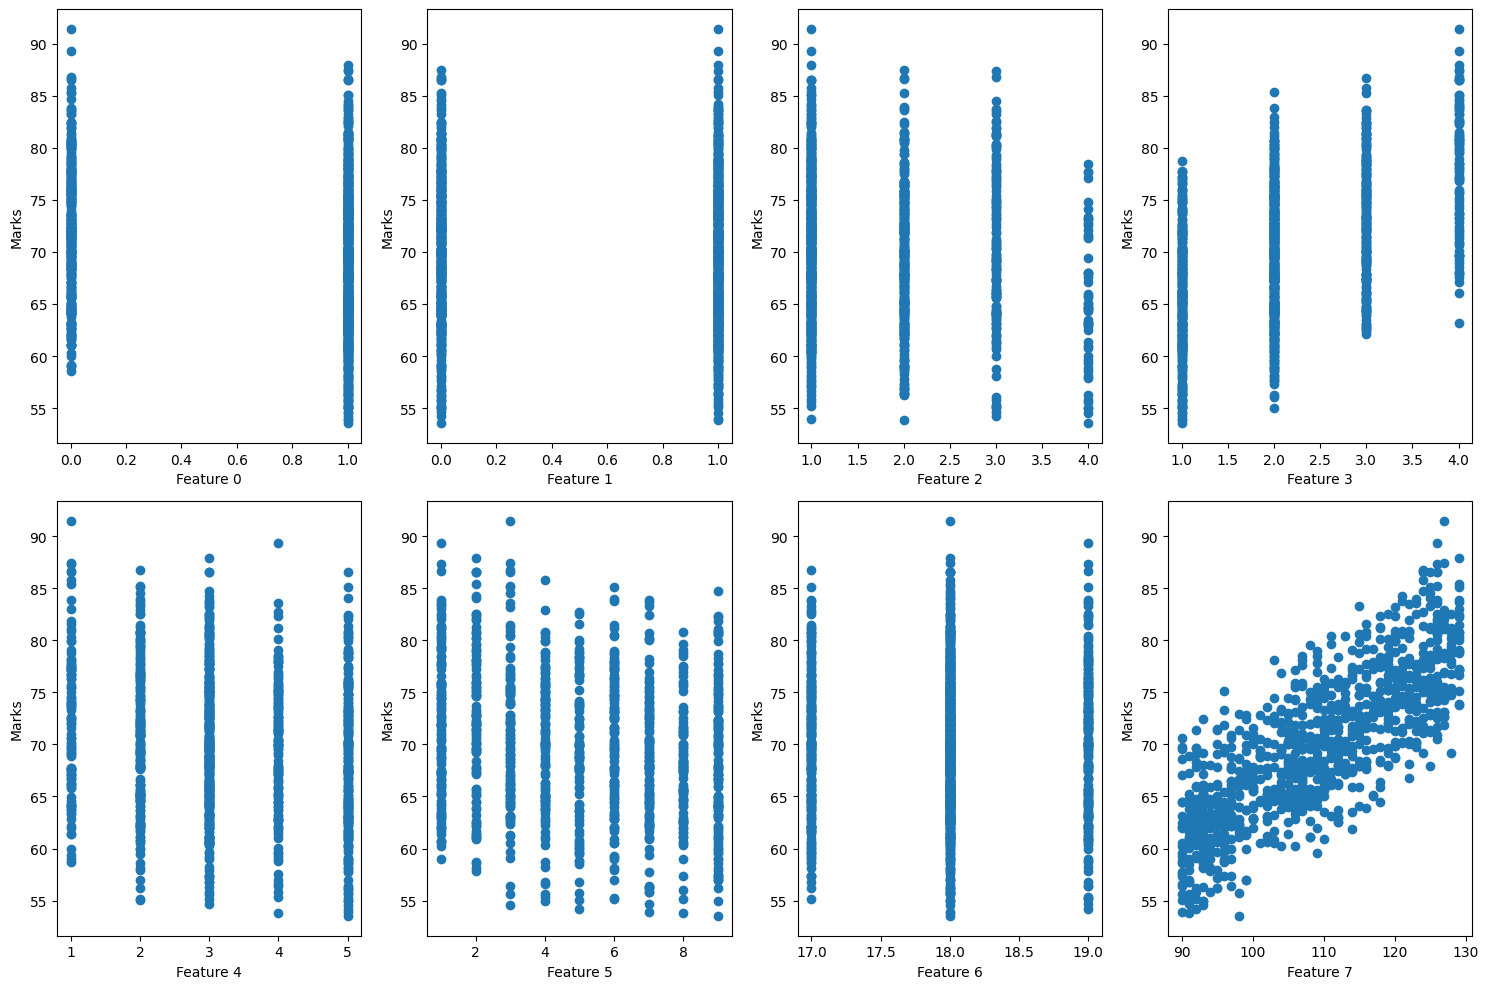

In [30]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    label_encoder = LabelEncoder() # Use the imported LabelEncoder class
    for i in range(x_train.shape[1]):
        if isinstance(x_train[0, i], str):
            x_train[:, i] = label_encoder.fit_transform(x_train[:, i])
    return x_train


x_train = feature_changing(x_train)
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs = axs.ravel()

for i in range(x_train.shape[1]):
    axs[i].scatter(x_train[:, i], y_train)
    axs[i].set_xlabel(f'Feature {i}')
    axs[i].set_ylabel('Marks')

plt.tight_layout()
plt.show()

In [31]:
def z_score(x_train):
  x_mean = np.mean(x_train, axis=0)
  x_std = np.std(x_train, axis=0)
  x_train = (x_train - x_mean) / x_std

  return x_train,x_std,x_mean

In [32]:
def cost(x_train, y_train, w, b):
    m = len(y_train)
    y_pred = np.dot(x_train, w) + b
    loss = np.sum((y_pred - y_train) ** 2) / (2 * m)
    return loss

In [33]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.1):
    m = len(y_train)
    y_pred = np.dot(x_train, w) + b
    dw = np.dot(x_train.T, (y_pred - y_train)) / m
    db = np.sum(y_pred - y_train) / m
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [34]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/Training data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Training data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 500.0%
